In [ ]:
from tensorflow.keras.datasets.mnist import load_data


train, test = load_data()
x_train, y_train = train

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape # 60000 images de taile 28x28

(60000, 28, 28)

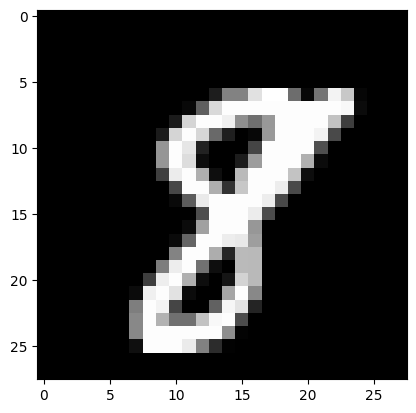

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[55], cmap="gray")

In [ ]:
x_train = x_train.reshape(60000, 28**2) # chaque image devient un tableau 1D

x_train.shape

(60000, 784)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense


# règle "fausse", en général les neurones des couches sauf les dernieres (couches cachées / hidden layer) -> on peut utiliser relu par défaut
model = Sequential() #réseau de neurone vide
model.add(Input([28*28]))
model.add(Dense(200, activation="relu")) # 200 neurones dans la première couche
model.add(Dense(100, activation="relu")) # 100 neurons (activation = relue)
model.add(Dense(10, activation="softmax")) # 1 neurone par catégorie !!!

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd")

In [ ]:
model.fit(x_train, y_train, epochs=10) # le modèle ne progresse pas beaucoup

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 151413056.0000
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3012
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3008
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.3009
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2.3014
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3012
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.3012
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3013


In [ ]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [ ]:
# on min max scale les donnée -> ramner proche de 0

x_train = (x_train.astype("float") - 0.0 ) / (255.0 - 0.0)

In [ ]:
x_train.min(), x_train.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential() #réseau de neurone vide
model.add(Input([28*28]))
model.add(Dense(300, activation="relu")) # 200 neurones dans la première couche
model.add(Dense(10, activation="softmax")) # 10 neurones dans la dernière

model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=30) # le modèle ne progresse pas beaucoup

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9841
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3518
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.2863
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2528
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2329
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2115
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1956
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1854
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1680
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1572
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1477
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1377
Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1334
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1204
Epoch 15/30
1875/1875 ━━━━━━

In [ ]:
# la loss (les erreurs diminues bien! )

In [ ]:

probas = model.predict(x_train[8:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
probas

array([[1.6196464e-06, 9.9642891e-01, 3.9027895e-05, 8.6849916e-04,
        2.1959086e-04, 1.3653196e-04, 4.8507351e-05, 1.0026951e-03,
        1.0861810e-03, 1.6851169e-04]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(probas)

np.int64(1)

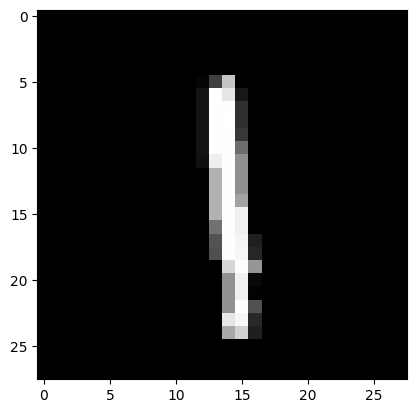

In [ ]:
plt.imshow(x_train[8].reshape(28,28), cmap="gray")

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential() #réseau de neurone vide
model.add(Input([28*28]))

model.add(Conv2D(32, activation="relu"))
model.add(Conv2D(64, activation="relu"))

model.add(Dense(300, activation="relu")) # 200 neurones dans la première couche
model.add(Dense(10, activation="softmax")) # 10 neurones dans la dernière

model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd")